In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import pprint
import matplotlib as mpl
import calendar

In [4]:
#Read CSV and create data frames
collisions = pd.read_csv(r"C:\Users\61102\Downloads\California-Traffic-Collisions-Data\collisions.csv",  low_memory=False,  parse_dates=["collision_date"])
parties = pd.read_csv(r"C:\Users\61102\Downloads\California-Traffic-Collisions-Data\parties.csv", low_memory=False)
victims = pd.read_csv(r"C:\Users\61102\Downloads\California-Traffic-Collisions-Data\victims.csv",  low_memory=False)
# fault_collisions = pd.read_csv(r"C:\Users\61102\Downloads\California-Traffic-Collisions-Data\fault_collisions.csv",  low_memory=False)

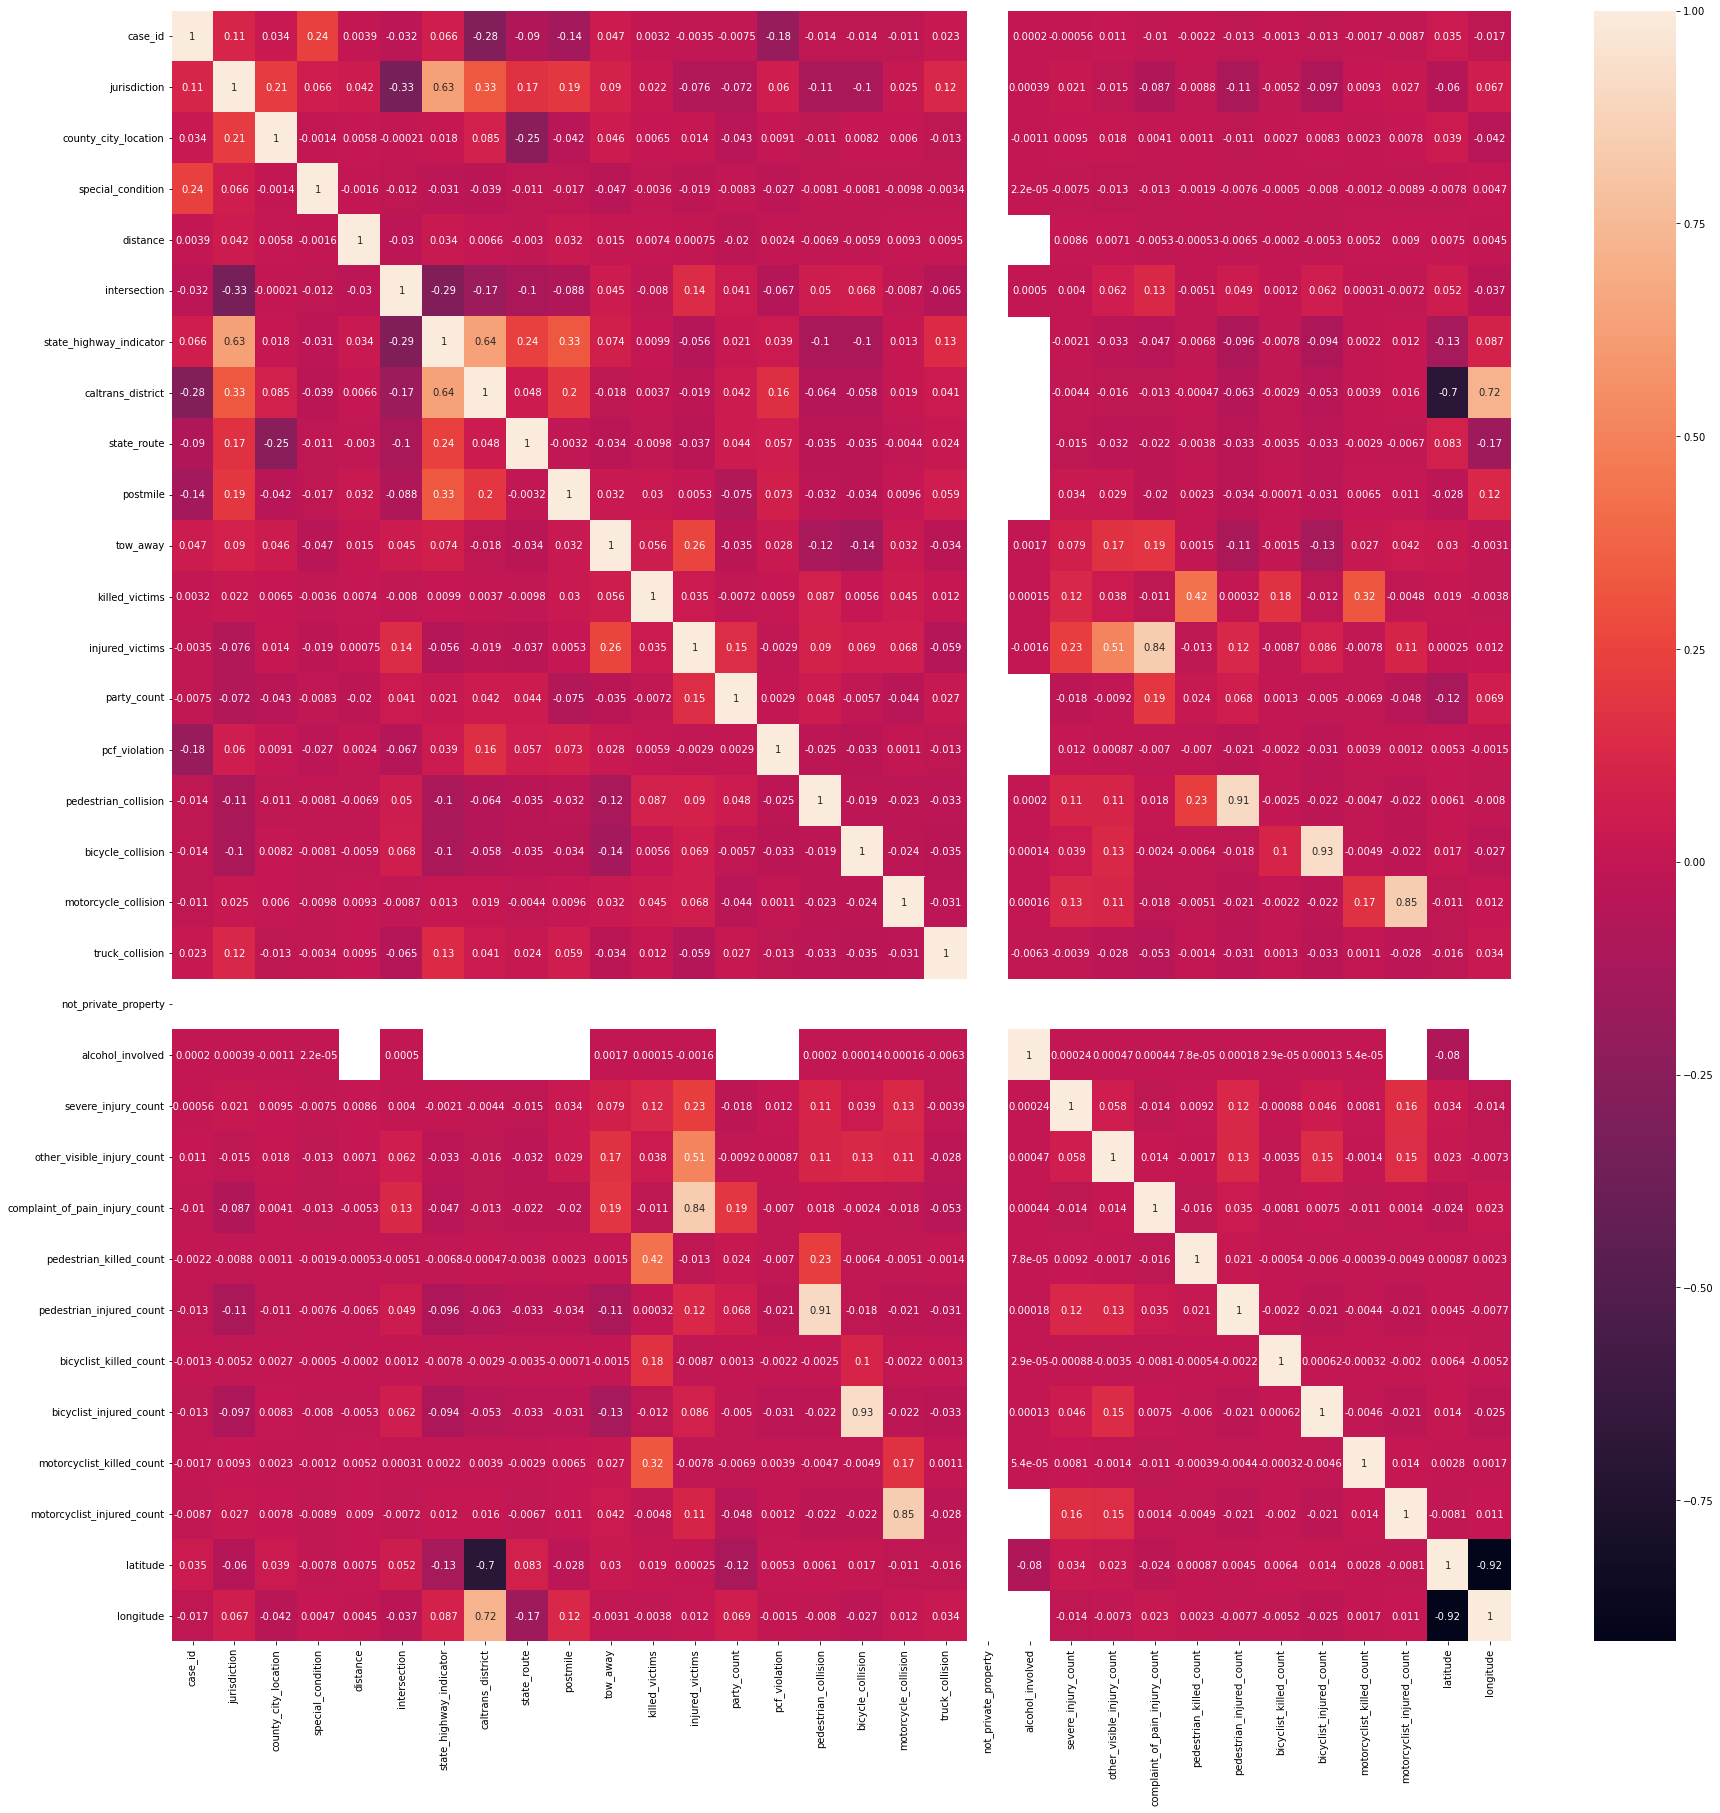

In [5]:
#Correlation Matrix of Collisions
corrMatrix = collisions.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corrMatrix, annot=True, ax=ax, annot_kws={"size":10})
plt.show()

In [6]:
collisions["MONTH"] = collisions["collision_date"].dt.month
collisions["YEAR"] = collisions["collision_date"].dt.year

C:\Users\61102\anaconda3\envs\GPU-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


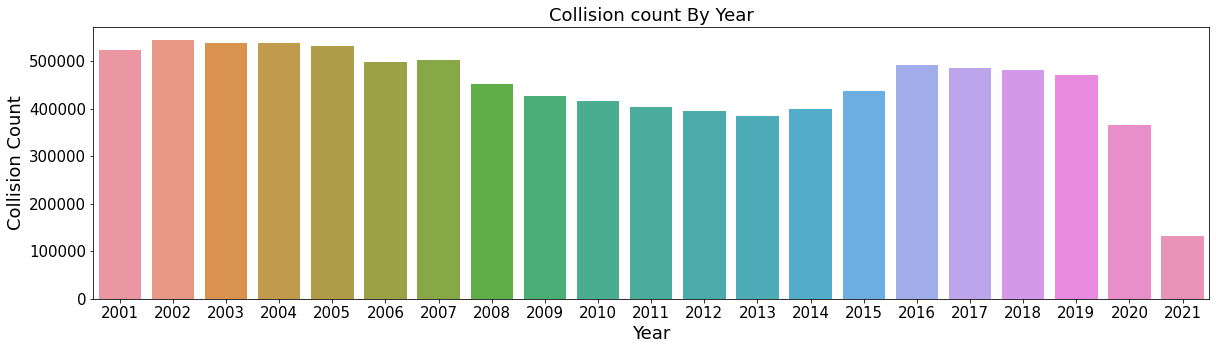

In [7]:
#Collisions decline or not?
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(collisions["collision_date"].dt.year,ax=ax)
ax.set_xlabel('Year', fontsize=18)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylabel('Collision Count', fontsize=18)
plt.title("Collision count By Year", fontsize=18)
plt.show()

In [8]:
a = collisions[collisions['YEAR']!=2020].groupby(['MONTH'])['case_id'].count()/collisions[collisions['YEAR']!=2020].groupby(['MONTH']).size().nunique()
a = a.to_frame()
a.reset_index(inplace=True)
a.rename(columns = {'case_id':'2013-2019'}, inplace=True)
b= collisions[collisions['YEAR']==2020].groupby(['MONTH'])['case_id'].count()
b = b.to_frame()
b.reset_index(inplace=True)
b.rename(columns = {'case_id':'2020'}, inplace=True)
# merging dataframes
df_compare = pd.merge(a, b, on='MONTH', how='left')

In [9]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2013-2019'],mode='lines+markers', 
                         name='Before 2020'))
fig.add_trace(go.Scatter(x=df_compare['MONTH'], y=df_compare['2020'],mode='lines+markers',
                        name='2020'))
fig.update_layout(title="Impact of COVID-19 on Road Accidents",
                  xaxis_title='Month',
                  yaxis_title='Average Number of Accidents'
                 )
fig.show()

C:\Users\61102\anaconda3\envs\GPU-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



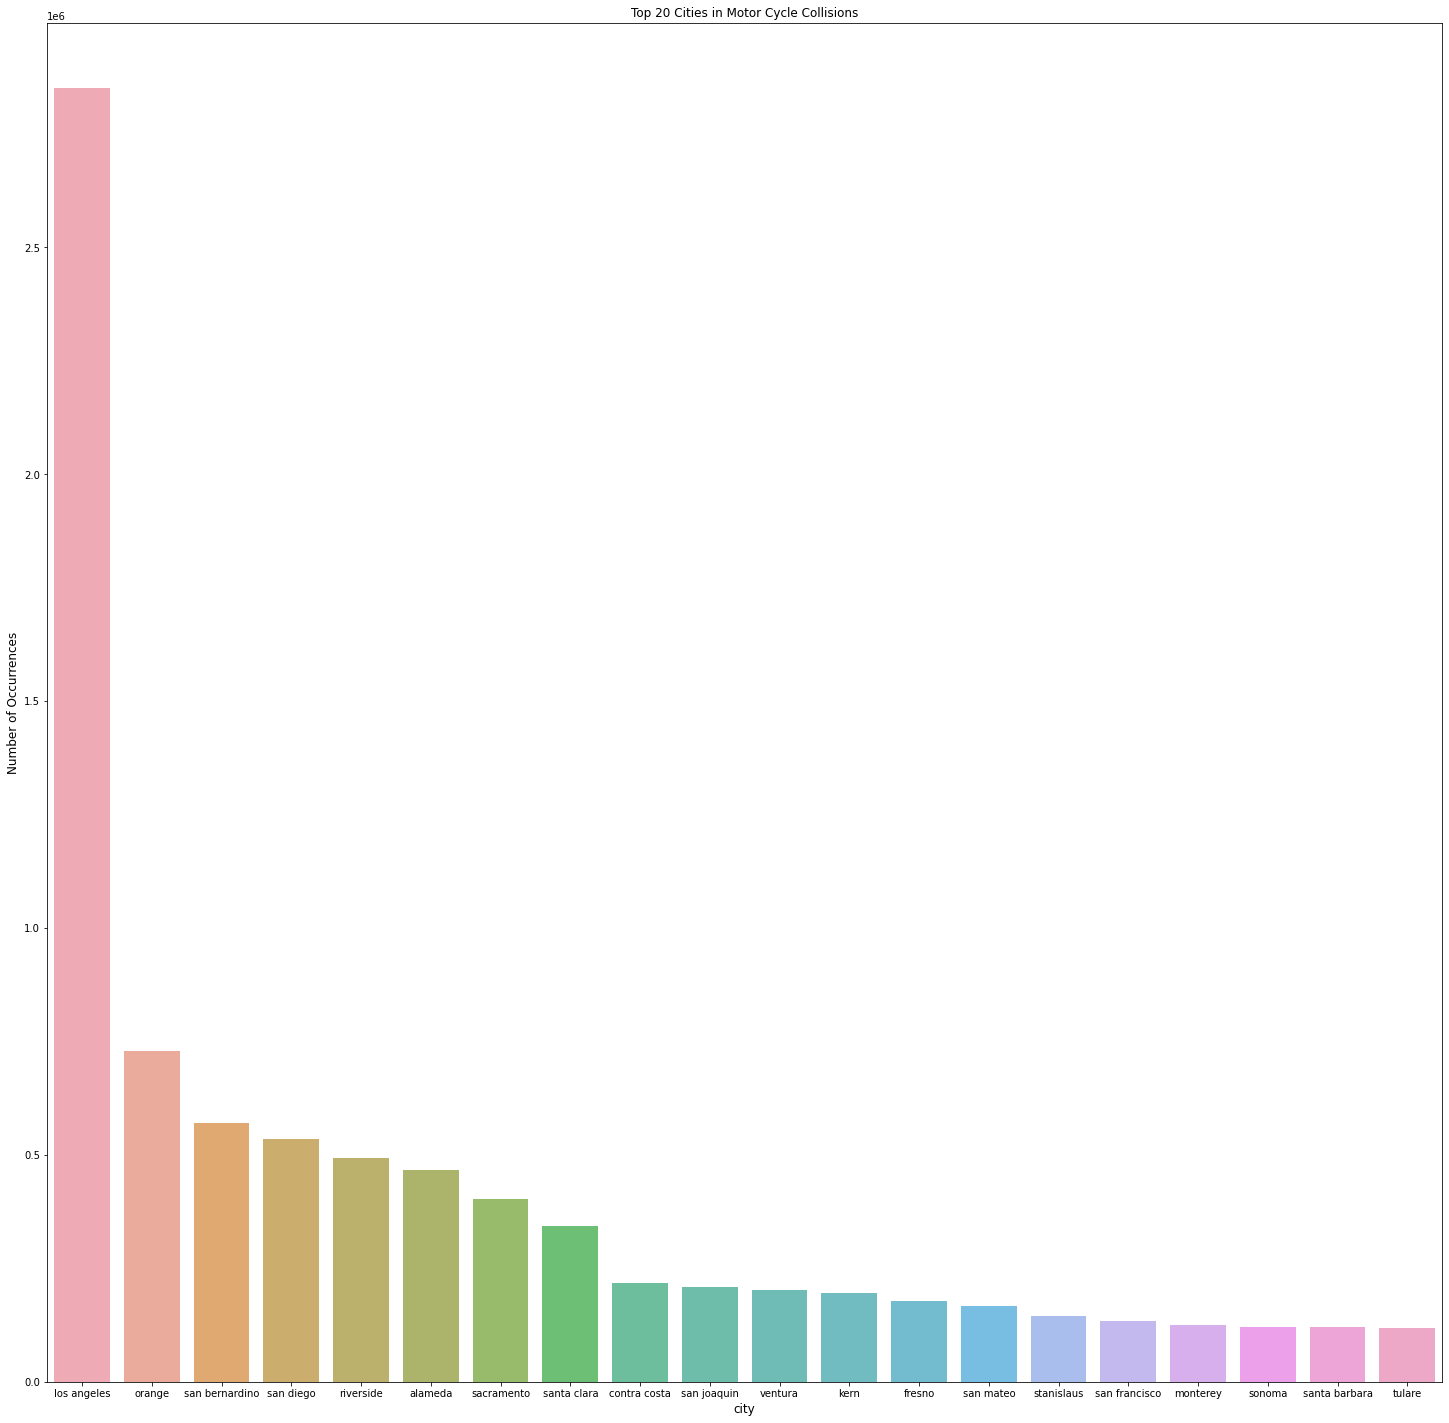

In [15]:
#types of collisions
#What locations have a lot of motor cycle collisions?
city_count  = collisions['county_location'].value_counts()
city_count = city_count[:20,]
plt.figure(figsize=(25,25))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('Top 20 Cities in Motor Cycle Collisions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

In [16]:
#Create Time of Day
collisions["collision_time"] = pd.to_datetime(collisions["collision_time"])
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
collisions["time_of_day"] = pd.cut(collisions["collision_time"].dt.hour, bins=b, labels=l, include_lowest=True)

C:\Users\61102\anaconda3\envs\GPU-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



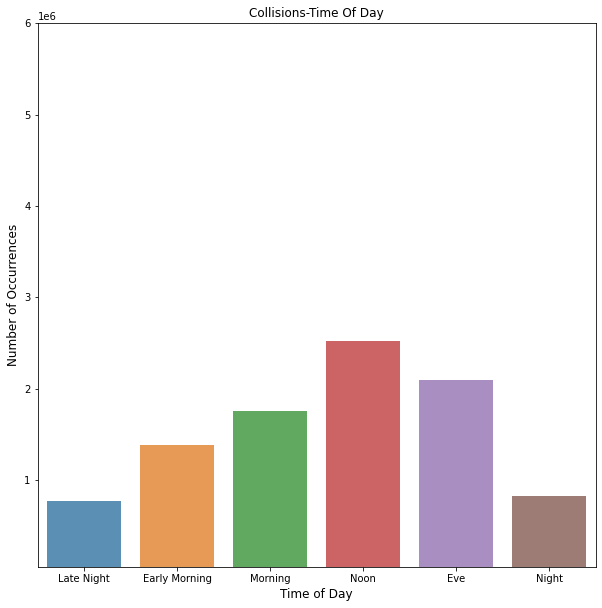

In [17]:
time_of_day_count  =  collisions['time_of_day'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(time_of_day_count.index, time_of_day_count.values, alpha=0.8)
plt.title('Collisions-Time Of Day')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Time of Day', fontsize=12)
plt.ylim(50000, 6000000)
plt.show()

In [18]:
grouped_df = collisions.groupby(['county_location', 'time_of_day'])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "total_count"))
grouped_df

county_location    time_of_day  total_count
0           alameda     Late Night        37959
1           alameda  Early Morning        68868
2           alameda        Morning        89782
3           alameda           Noon       121707
4           alameda            Eve       104122
..              ...            ...          ...
343            yuba  Early Morning         2566
344            yuba        Morning         3015
345            yuba           Noon         4548
346            yuba            Eve         3699
347            yuba          Night         1546

[348 rows x 3 columns]

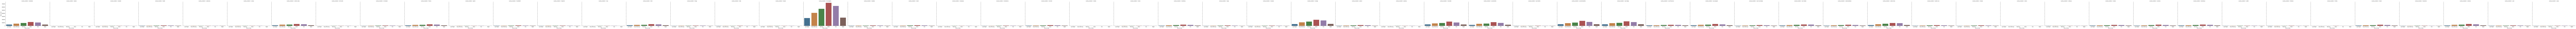

In [19]:
# Are there locations that become more accidents prone at night?
sns.catplot(x="time_of_day", y="total_count", col="county_location",
                 data=grouped_df, saturation=.5,
                 kind="bar", ci=None, aspect=1.5)
plt.tight_layout()

C:\Users\61102\anaconda3\envs\GPU-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



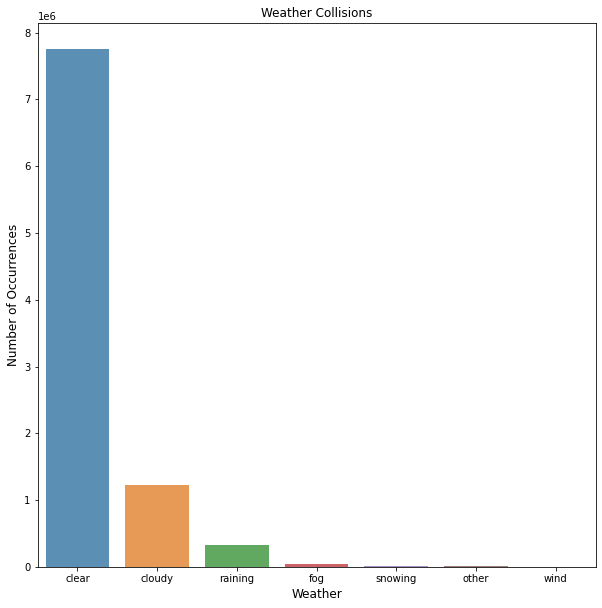

In [20]:
#Weather Analysis
weather_count  =  collisions['weather_1'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(weather_count.index, weather_count.values, alpha=0.8)
plt.title('Weather Collisions')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather', fontsize=12)
plt.show()

In [24]:
severity_count  =  collisions['collision_severity'].value_counts()
severity_count

property damage only    5704634
pain                    2268304
other injury            1163199
severe injury            221775
fatal                     66421
N                             1
Name: collision_severity, dtype: int64

C:\Users\61102\anaconda3\envs\GPU-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



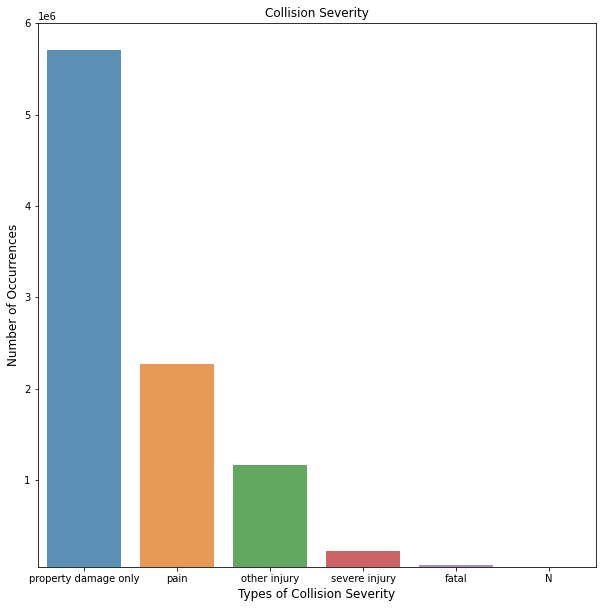

In [25]:
plt.figure(figsize=(10,10))
sns.barplot(severity_count.index, severity_count.values, alpha=0.8)
plt.title('Collision Severity')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types of Collision Severity', fontsize=12)
plt.ylim(50000, 6000000)
plt.show()

In [29]:
#alcohol involvement
alcohol_involvement  =  collisions['alcohol_involved'].value_counts()
alcohol_involvement

1.0    944463
0.0         1
Name: alcohol_involved, dtype: int64

array([<AxesSubplot:ylabel='alcohol_involved'>], dtype=object)

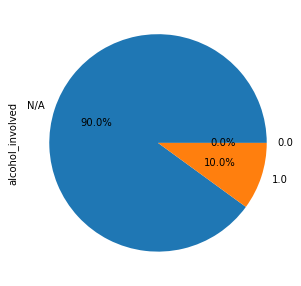

In [30]:
alcohol = collisions["alcohol_involved"]
alcohol = alcohol.fillna('N/A')
alcohol.value_counts(normalize=True).plot.pie(subplots=True, figsize=(5, 5), autopct='%1.1f%%')

In [31]:
# Alocohol involvement and Collision Severity Relatedness
collisions[collisions["alcohol_involved"]==1.0]["collision_severity"].value_counts(normalize=True)*100

property damage only    57.256346
other injury            18.873688
pain                    15.848053
severe injury            5.562420
fatal                    2.459387
N                        0.000106
Name: collision_severity, dtype: float64

In [35]:
#Without alchohol
collisions[collisions["alcohol_involved"].isnull()]["collision_severity"].value_counts(normalize=True)*100

property damage only    60.895603
pain                    24.984168
other injury            11.615084
severe injury            1.995785
fatal                    0.509359
Name: collision_severity, dtype: float64

Text(0.5, 1.0, '% of Collision Count by Time of Day Due To Alcohol Involvement')

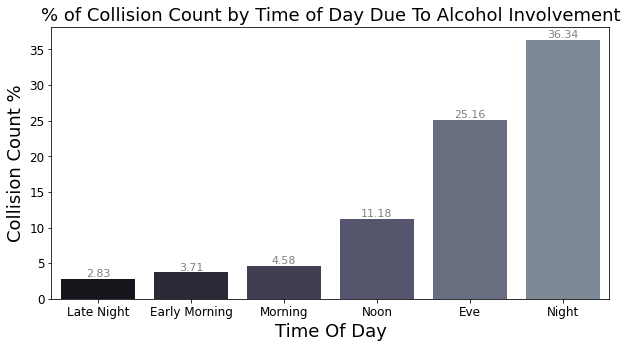

In [37]:
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(y=((collisions.groupby('time_of_day')['alcohol_involved'].apply(lambda x: x[x == 1.0].count()) /collisions.groupby('time_of_day')['case_id'].count())*100).sort_values(), x=list(collisions.groupby('time_of_day').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Time Of Day', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Collision Count by Time of Day Due To Alcohol Involvement", fontsize=18)

In [38]:
day_type = np.array([1 if x.weekday() < 5 else 0 for x in collisions['collision_date']])
collisions['day_type'] = day_type

Text(0.5, 1.0, '% of Collision Count By Day Type Due to Alcohol Involvement')

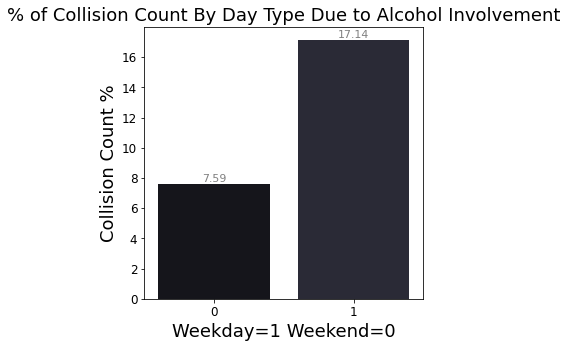

In [41]:
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(y=((collisions.groupby('day_type')['alcohol_involved'].apply(lambda x: x[x == 1.0].count()) /collisions.groupby('day_type')['case_id'].count())*100).sort_values(), x=list(collisions.groupby('day_type').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Weekday=1 Weekend=0', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Collision Count By Day Type Due to Alcohol Involvement", fontsize=18)

In [42]:
collisions['weather_1'] = collisions['weather_1'].fillna('N/A')
collisions['weather_2'] = collisions['weather_2'].fillna('N/A')

C:\Users\61102\anaconda3\envs\GPU-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



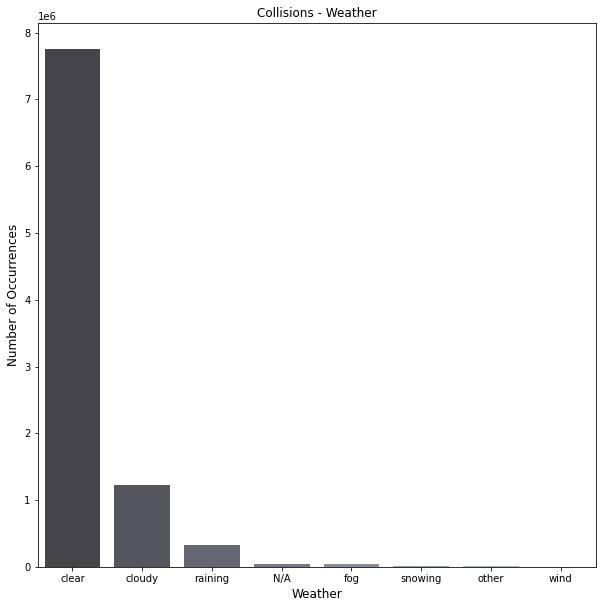

In [43]:
weather_count  =  collisions['weather_1'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(weather_count.index, weather_count.values, alpha=0.8)
plt.title('Collisions - Weather')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Weather', fontsize=12)
plt.show()

In [44]:
fatal_collisions = collisions[collisions['collision_severity']=='fatal']

Text(0.5, 1.0, '% of Collision Count By Day Type Due to Alcohol Involvement')

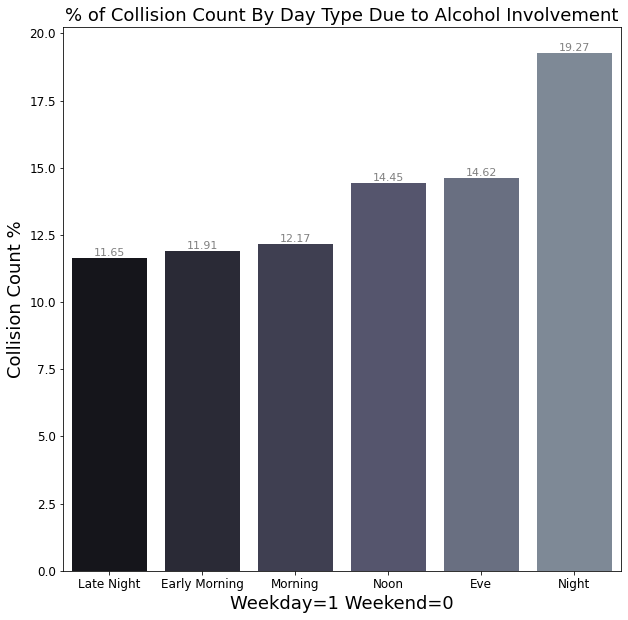

In [49]:
sns.set_palette(sns.color_palette("bone",10))
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y=((fatal_collisions.groupby('time_of_day')['weather_1'].apply(lambda x: x[x == 'cloudy'].count()) /fatal_collisions.groupby('time_of_day')['case_id'].count())*100).sort_values(), x=list(fatal_collisions.groupby('time_of_day').groups.keys()),ax=ax)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
ax.set_xlabel('Weekday=1 Weekend=0', fontsize=18)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.set_ylabel('Collision Count %', fontsize=18)
plt.title("% of Fatal Collision Count By Day Type Due to Alcohol Involvement", fontsize=18)